In [1]:
!ls

data                 titanic_kaggle.ipynb


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [24]:
data_train = ('./data/train.csv')
data_test = ('./data/test.csv')
data_sub = ('./data/gender_submission.csv')

train = pd.read_csv(data_train)
test = pd.read_csv(data_test)
sub = pd.read_csv(data_sub)
             

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

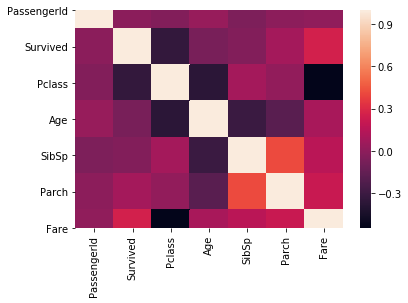

In [28]:
sns.heatmap(train.corr())

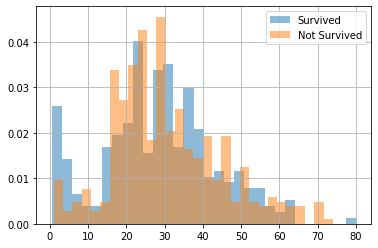

In [32]:
train.query('Survived == 1').Age.hist(bins=30, alpha=.5, normed=True, label='Survived');
train.query('Survived == 0').Age.hist(bins=30, alpha=.5, normed=True, label='Not Survived');
plt.legend();

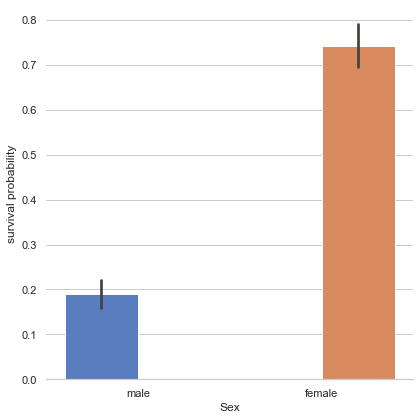

In [38]:
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Sex", y="Survived", hue="Sex", data=train, height=6, kind="bar", palette="muted")

g.despine(left=True)
g.set_ylabels("survival probability")

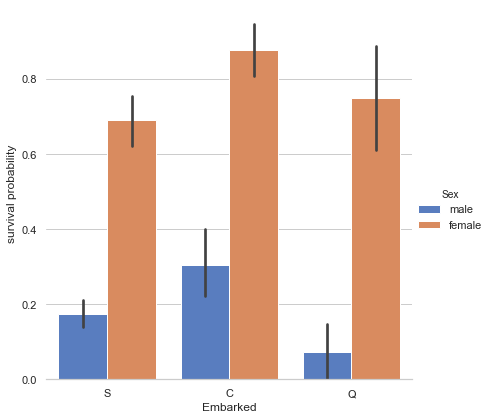

In [39]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Embarked", y="Survived", hue="Sex", data=train, height=6, kind="bar", palette="muted")

g.despine(left=True)
g.set_ylabels("survival probability")

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
# set X and y
y = train['Survived']
train.drop('Survived', axis=1, inplace=True)
train.drop('Cabin', axis=1, inplace=True)

train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [51]:
train.Parch.value_counts(), train.SibSp.value_counts()

(0    678
 1    118
 2     80
 5      5
 3      5
 4      4
 6      1
 Name: Parch, dtype: int64, 0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: SibSp, dtype: int64)

In [57]:
# Fare, Embarked, and Age have missing values we will need to fix
# Dummy sex column
# Drop passengerid, name, ticket, and cabin
X = pd.DataFrame()
X[['Pclass', 'SibSp', 'Parch']] = train[['Pclass', 'SibSp', 'Parch']]

In [58]:
X['female'] = pd.get_dummies(train['Sex'])['female']
X_test = pd.DataFrame()
X_test[['Pclass', 'SibSp', 'Parch']] = test[['Pclass', 'SibSp', 'Parch']]
X_test['female']=pd.get_dummies(test['Sex'])['female']
X_test.head()

,Pclass,SibSp,Parch,female
0,3,0,0,0
1,3,1,0,1
2,2,0,0,0
3,3,0,0,0
4,3,1,1,1


In [59]:
X[['C', 'Q', 'S']] = pd.get_dummies(train['Embarked'])
X_test[['C', 'Q', 'S']] = pd.get_dummies(test['Embarked'])

In [62]:
X_test.head(), X.head()

(   Pclass  SibSp  Parch  female  C  Q  S
 0       3      0      0       0  0  1  0
 1       3      1      0       1  0  0  1
 2       2      0      0       0  0  1  0
 3       3      0      0       0  0  0  1
 4       3      1      1       1  0  0  1,
    Pclass  SibSp  Parch  female  C  Q  S
 0       3      1      0       0  0  0  1
 1       1      1      0       1  1  0  0
 2       3      0      0       1  0  0  1
 3       1      1      0       1  0  0  1
 4       3      0      0       0  0  0  1)

In [64]:
# fill missing age value with average age value
X['Age'] = train['Age'].fillna(np.mean(train['Age']))
X_test['Age'] = test['Age'].fillna(np.mean(train['Age']))

In [65]:
# fill missing fare value with average fare value
X['Fare'] = train['Fare'].fillna(np.mean(train['Fare']))
X_test['Fare'] = test['Fare'].fillna(np.mean(train['Fare']))

In [66]:
# Train test split
# Cross validation

# Instantiate
clf = LogisticRegression()

# Fit 
clf.fit(X,y)

# Predict
y_test = clf.predict(X_test)

# Score
y_test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [68]:
sub_2 = pd.DataFrame()
sub_2['PassengerId'] = sub['PassengerId']

sub_2['Survived'] = y_test

sub_2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [69]:
sub_2.to_csv('logistic_preds_titanic.csv', index=False)

In [70]:
gb = GradientBoostingClassifier()

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.1, 1],
    "max_depth":[3, 8 ,10],
    "max_features":["sqrt"],
    "n_estimators":[10]
    }

clf = GridSearchCV(gb, parameters, cv=3, n_jobs=-1)
clf.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...ne,
                                                  presort='auto',

In [72]:
y_test = clf.predict(X_test)

submission_3 = pd.DataFrame()
submission_3['PassengerId'] = sub['PassengerId']

submission_3['Survived'] = y_test

submission_3
submission_3.to_csv('./data/gbm_preds.csv', index=False)